In [16]:
import os
import sys
sys.path.append('../')
import numpy as np
import scipy.io as scio
import h5py
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
import torch
from torch import nn
import torch.nn.functional as F
from torchvision.transforms.functional import adjust_sharpness
import numba
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tempfile import gettempdir
from kwave.ksource import kSource
from kwave.kspaceFirstOrder2D import kspaceFirstOrder2DC
from kwave.utils import *
from kwave.ktransducer import *
from kwave.kmedium import kWaveMedium

%matplotlib inline

### Load Data

In [31]:
data_path = '/mnt/WD6TB/tianaoli/Mice/'
data = h5py.File(os.path.join(data_path, 'mice_full_recon.mat'))
mice_full_recon = data['full_recon_all']
print(mice_full_recon.shape)

(274, 512, 512)


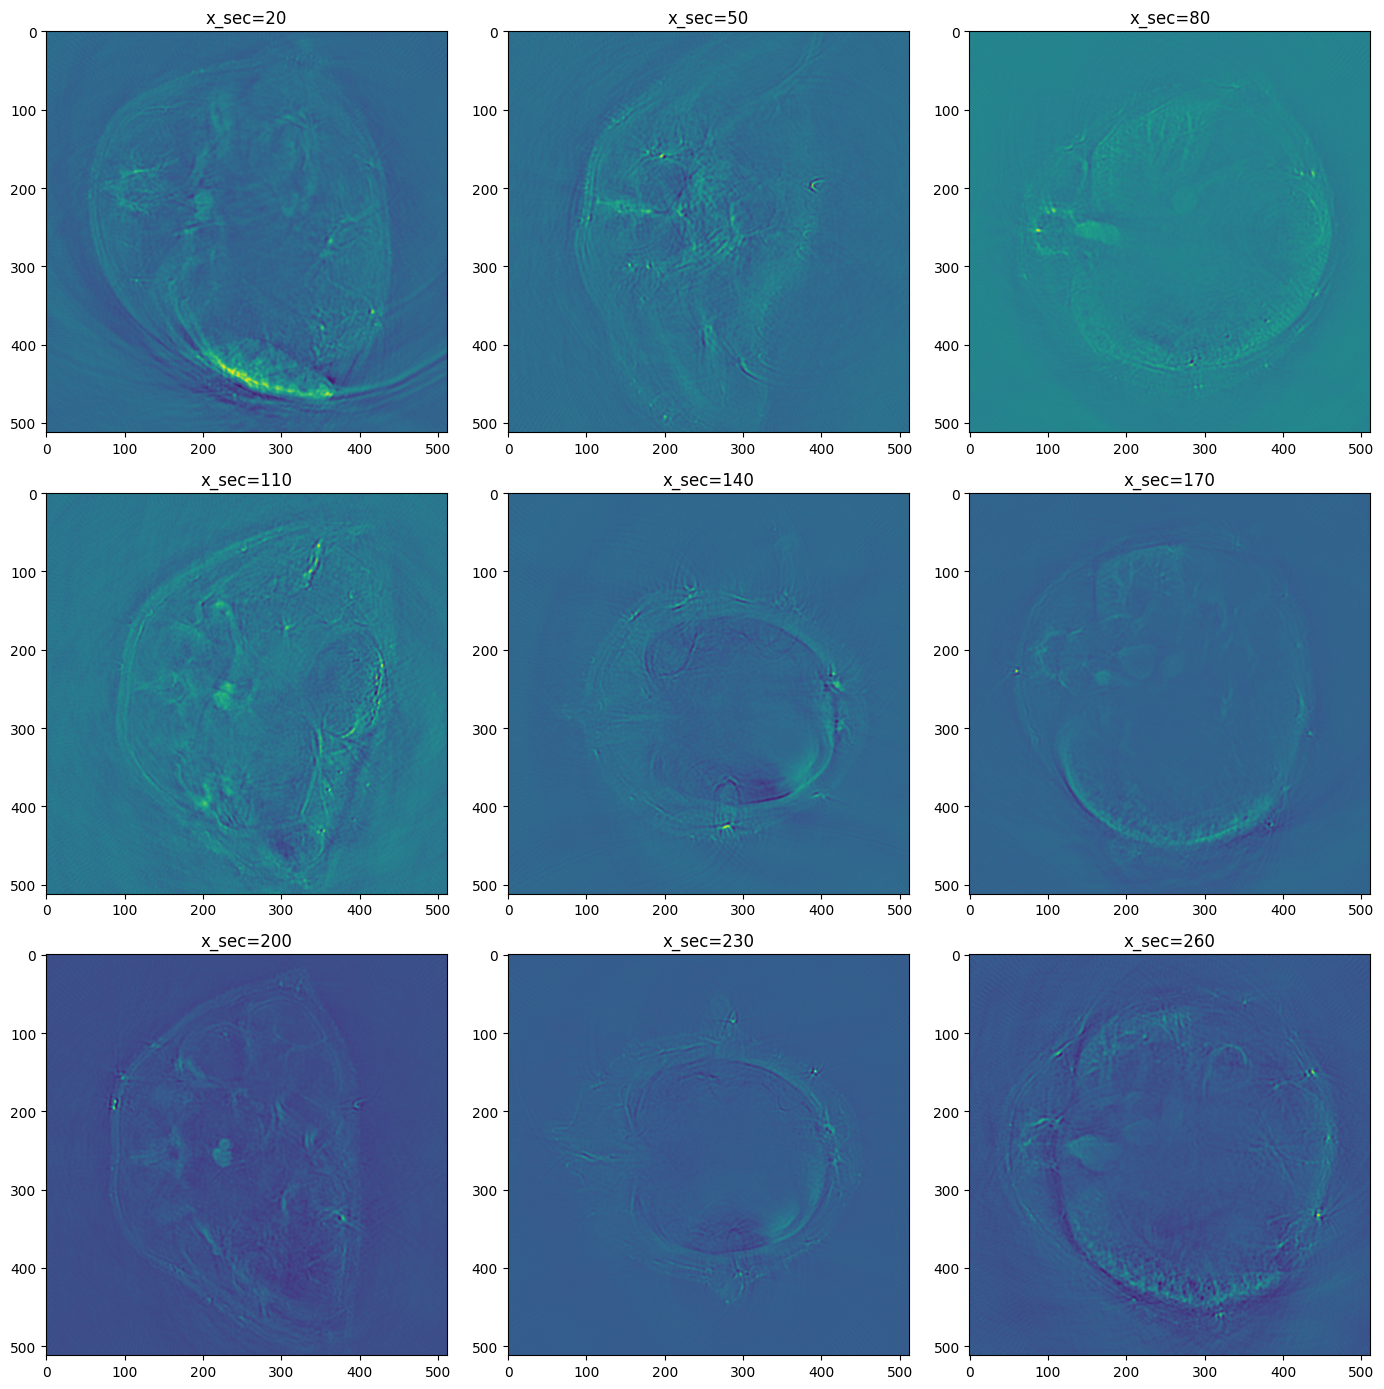

In [18]:
plt.figure(figsize=(14,14))
for i in range(9):
    x_sec = 20 + 30 * i
    plt.subplot(3,3,i+1)
    plt.imshow(mice_full_recon[x_sec,:,:])
    plt.title(f'x_sec={x_sec}')
plt.tight_layout()

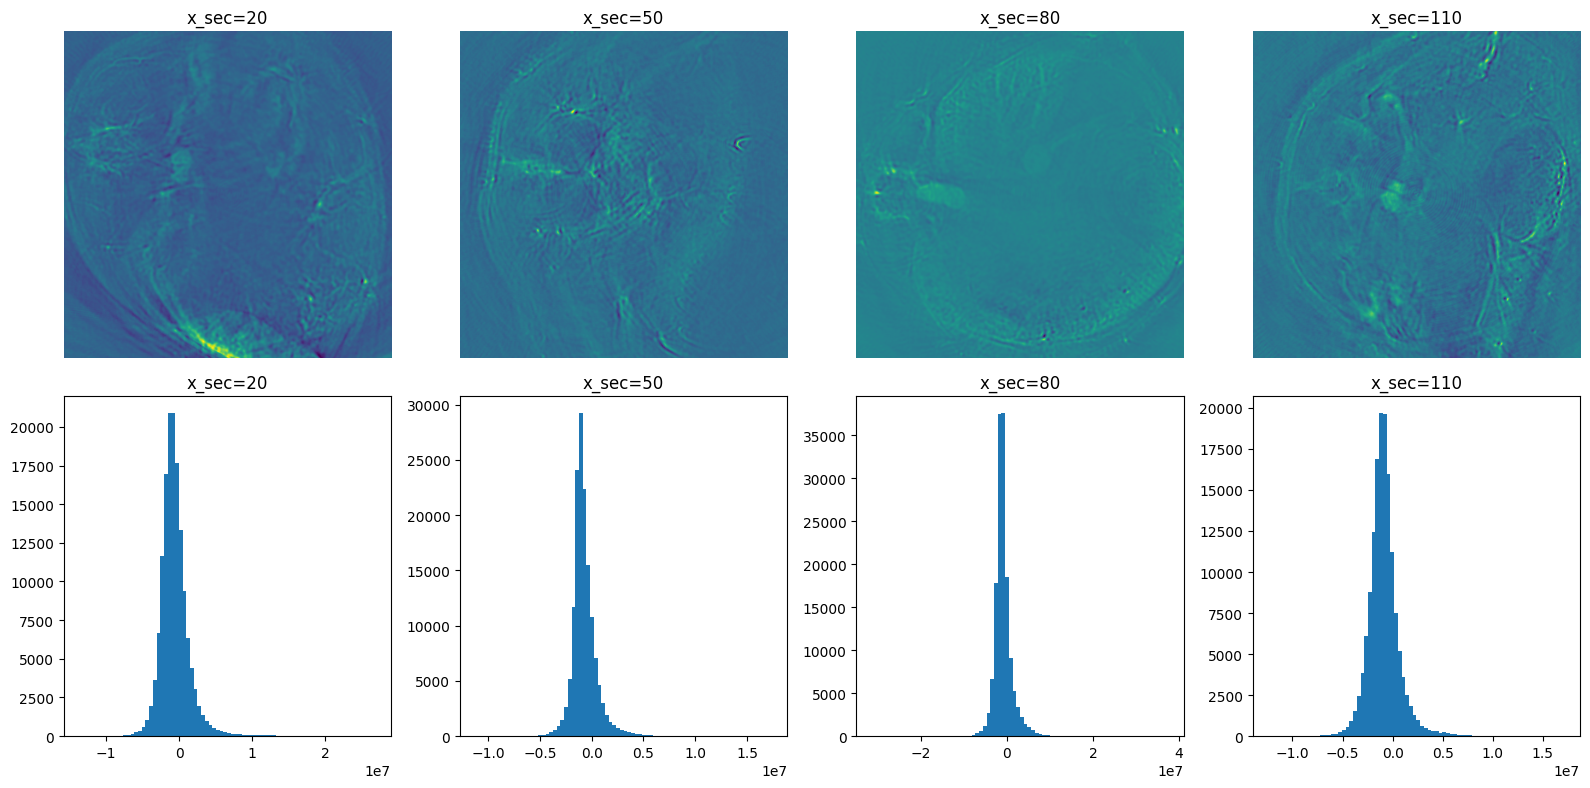

In [28]:
fig = plt.figure(figsize=(16,8))
clip = 64
for i in range(4):
    x_sec = 20 + 30 * i
    plt.subplot(2,4,i+1)
    plt.imshow(mice_full_recon[x_sec,clip:-clip,clip:-clip,])
    plt.title(f'x_sec={x_sec}')
    plt.axis('off')
    
    plt.subplot(2,4,i+5)
    plt.hist(mice_full_recon[x_sec,clip:-clip,clip:-clip,].ravel(), bins=80)
    plt.title(f'x_sec={x_sec}')
    
plt.tight_layout()

In [34]:
data = h5py.File(os.path.join(data_path, 'mice_sparse4_recon.mat'))
mice_sparse4_recon = data['sparse4_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse8_recon.mat'))
mice_sparse8_recon = data['sparse8_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse16_recon.mat'))
mice_sparse16_recon = data['sparse16_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse32_recon.mat'))
mice_sparse32_recon = data['sparse32_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse64_recon.mat'))
mice_sparse64_recon = data['sparse64_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse128_recon.mat'))
mice_sparse128_recon = data['sparse128_recon_all']
data = h5py.File(os.path.join(data_path, 'mice_sparse256_recon.mat'))
mice_sparse256_recon = data['sparse256_recon_all']

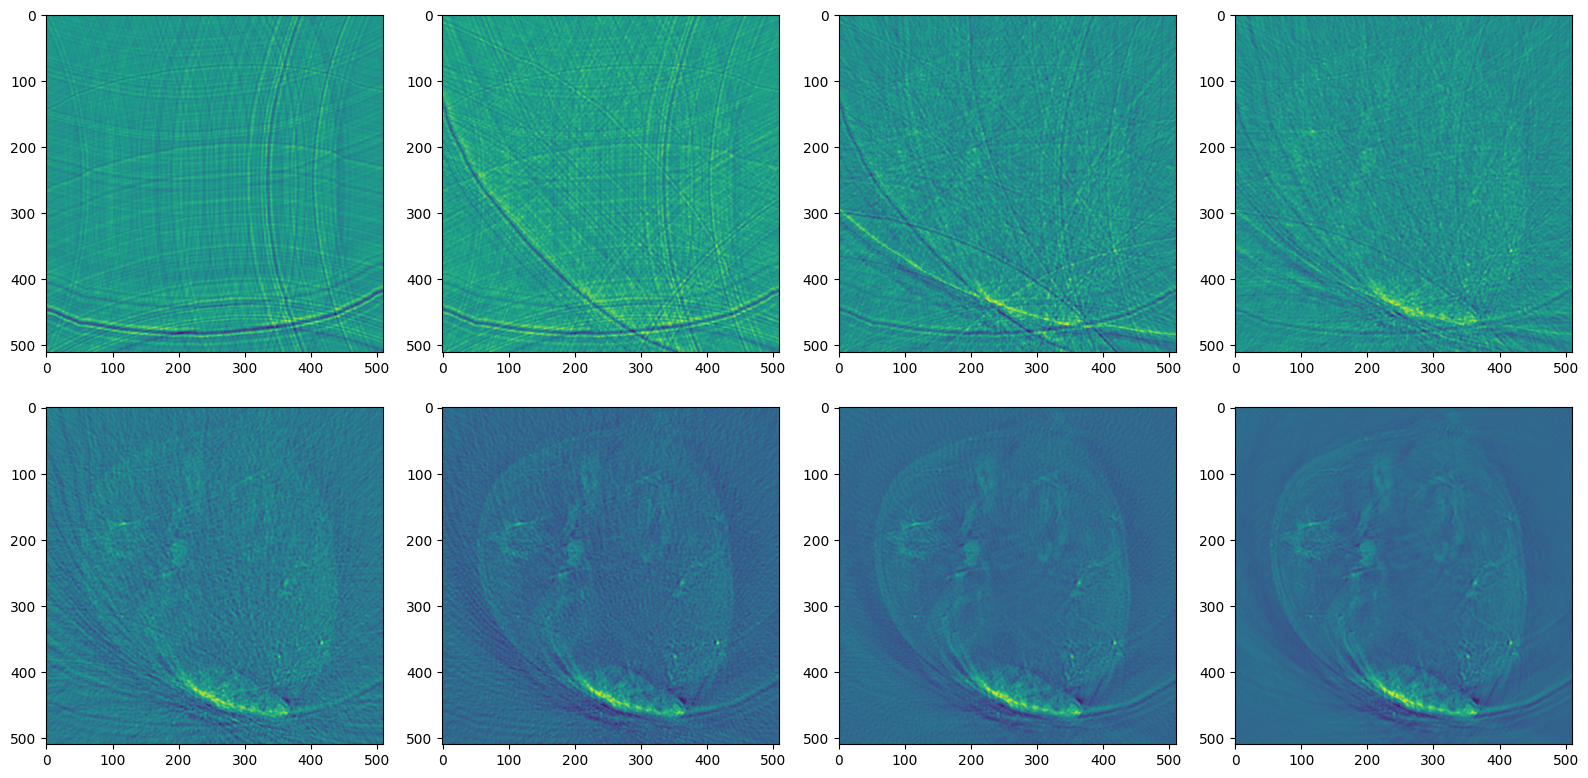

In [38]:
fig = plt.figure(figsize=(16,8))
recons = [mice_sparse4_recon, mice_sparse8_recon, mice_sparse16_recon, mice_sparse32_recon,
          mice_sparse64_recon, mice_sparse128_recon, mice_sparse256_recon, mice_full_recon]
for i, recon in enumerate(recons):
    x_sec = 20
    clip = 1
    plt.subplot(2,4,i+1)
    plt.imshow(recon[x_sec,clip:-clip,clip:-clip])
plt.tight_layout()